In [12]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from anemoi.datasets import open_dataset
import cmocean

In [9]:
#open dataset
file_path = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2023.zarr'
ds = open_dataset(file_path, select = ["Uwind_eastward"])


# Create a figure and axis with coastlines
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the scatter plot
sc = ax.scatter(ds.longitude, ds.latitude, c=ds.isel(time=0)['temperature_1'], s=5, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Temperature')

# Update function for animation
def update(frame):
    sc.set_array(ds.isel(time=frame)['temperature_1'].values)
    ax.set_title(f'Time step: {frame}')
    return sc,

# Create animation 48 h
ani = FuncAnimation(fig, update, frames=range(48), blit=True, interval=200)

# Save the animation as a GIF (optional)
ani.save('temperature_animation.gif', writer='imagemagick') # or ffmpeg


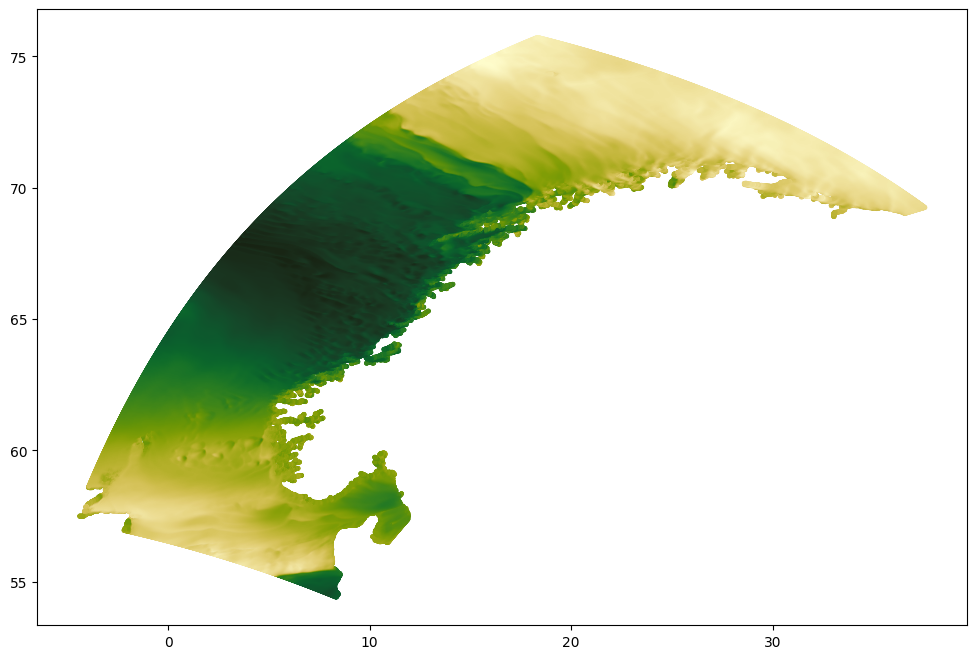

In [13]:
fig,ax = plt.subplots(figsize = (12,8))
sc = ax.scatter(ds.longitudes, ds.latitudes, c=ds[0,0,0,:], s = 5, cmap = cmocean.cm.speed)


In [ ]:
fig,ax = plt.subplots(figsize = (12,8))
sc = ax.scatter(ds.longitudes, ds.latitudes, c=ds[0,0,0,:], s = 5, cmap = cmocean.cm.speed)
cbar = plt.colorbar(sc, ax = ax, orientation = "vertical", label = "Uwind")
def update(frame):
    sc.set_array(ds[frame,0,0,:])
    ax.set_title(f'Time step: {frame}')
    return sc

ani = FuncAnimation(fig, update, frames = range(48), interval = 200)
ani.save("temp_animation_0_25_2023.gif", writer = "imagemagick")

In [ ]:
#sjekke for v + abs(u+v)
#lage funksjon i python heller så kjøretiden blir saktere